In [218]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import os

In [219]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.11.0


In [220]:
print("Working Path Directory:", os.path)

Working Path Directory: <module 'ntpath' from 'c:\\Users\\Tober\\anaconda3\\lib\\ntpath.py'>


In [221]:
import cv2
import imghdr


In [222]:
dataDir = 'data'
img_exts = ['jpeg','jpg','bmp','png']


In [223]:
os.path.join(dataDir, vgData)
os.listdir(dataDir)

['daVinci', 'gustavK', 'vanGough', 'piccaso', 'reneM', 'dali', 'monet']

Listing directory for van gough data and dali data | Next is cleaning the data

In [224]:
img = cv2.imread(os.path.join(dataDir, vgData, 'image111.jpg'))

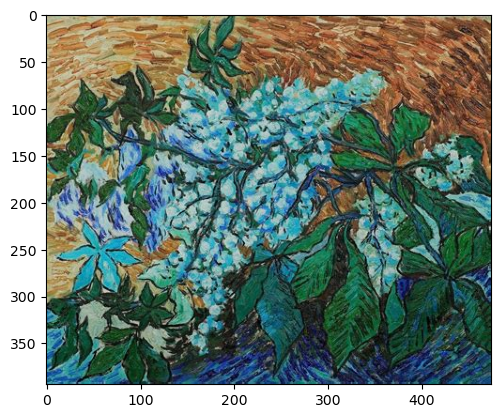

In [225]:
plt.imshow(img)

In [242]:
for image_class in os.listdir(dataDir): 
  for image in os.listdir(os.path.join(dataDir, image_class)):
        imagePath = os.path.join(dataDir, image_class, image)
        try: 
            cv2.resize(image, (254,254,3))
            img = cv2.imread(imagePath)
            tip = imghdr.what(imagePath)
            if tip not in img_exts:
              print("Image not in extension list {}".format(imagePath))
              os.remove(imagePath)
        except Exception as e:
          print('Issue with image {}'.format(imagePath))


Issue with image data\daVinci\image.jpg
Issue with image data\daVinci\image2.jpg
Issue with image data\daVinci\image3.jpg
Issue with image data\daVinci\image4.jpg
Issue with image data\daVinci\image5.jpg
Issue with image data\daVinci\image6.jpg
Issue with image data\daVinci\image7.jpg
Issue with image data\daVinci\image8.jpg
Issue with image data\daVinci\image9.jpg
Issue with image data\daVinci\image10.jpg
Issue with image data\daVinci\image11.jpg
Issue with image data\daVinci\image12.jpg
Issue with image data\daVinci\image13.jpg
Issue with image data\daVinci\image14.jpg
Issue with image data\daVinci\image15.jpg
Issue with image data\daVinci\image16.jpg
Issue with image data\daVinci\image17.jpg
Issue with image data\daVinci\image18.jpg
Issue with image data\daVinci\image19.jpg
Issue with image data\daVinci\image20.jpg
Issue with image data\daVinci\image21.jpg
Issue with image data\daVinci\image22.jpg
Issue with image data\daVinci\image23.jpg
Issue with image data\daVinci\image24.jpg
Is

ImageClass essentially is the pointer in directory for the folders and data 
Image is the actual image file

Loading in the data

In [227]:
import numpy as np
from matplotlib import pyplot as plt

loading dataset using keras utility, creates batchsize of 32 and resizes
images as well

In [228]:
data = tf.keras.utils.image_dataset_from_directory(dataDir, image_size=(254,254) batch_size=32)



Found 1785 files belonging to 7 classes.


accessing the datapipeline itself to grab next batch 

In [229]:
batch[1]
# Dali = 0
# VG = 1

array([0, 6, 2, 5, 4, 2, 4, 4, 0, 5, 6, 0, 0, 5, 3, 6, 6, 6, 5, 6, 6, 4,
       1, 6, 2, 6, 3, 4, 4, 6, 5, 6])

initial array element is image with second being the labels

In [230]:
# fix, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#   ax[idx].imshow(img.astype(int))
#   ax[idx].title.set_text(batch[1][idx])

#3 Preprocessing image data

3.1 Scaling Data: Division by 255 - batch[0] / 255

In [231]:
data = data.map(lambda x,y: (x/255, y))

using lamba function to scale dat, y would be the labels. 
gets data x and scales it by 255

In [244]:
scaled_iterator = data.as_numpy_iterator()

In [245]:
batch = scaled_iterator.next()

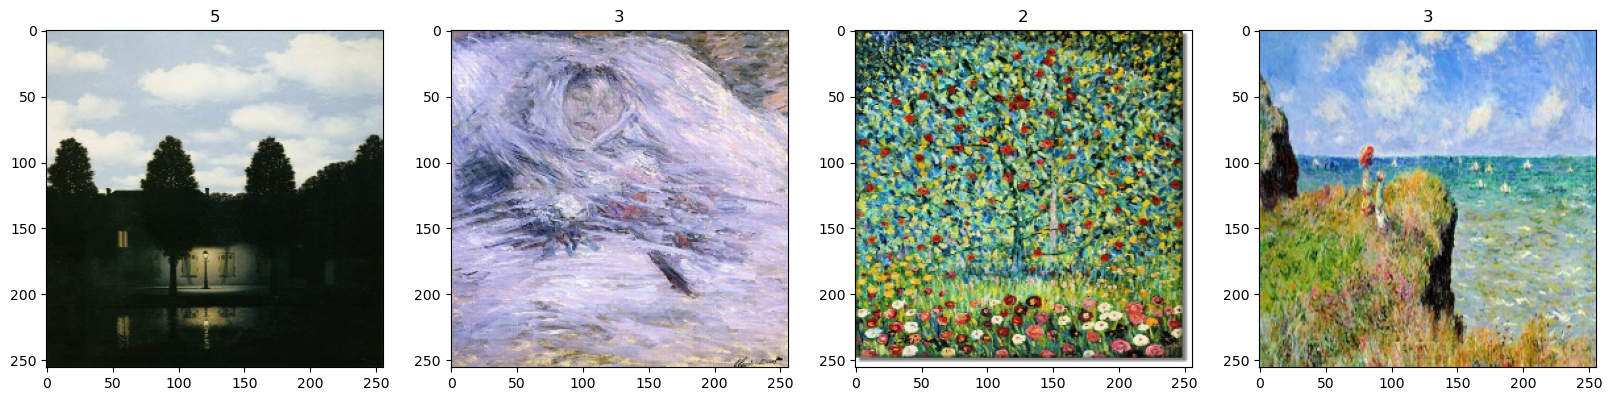

In [246]:
fix, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(float))
  ax[idx].title.set_text(batch[1][idx])

3.2 Split Data

In [235]:
len(data)

56

In [236]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

# (train_images, train_labels), (test_images, test_labels) = data.load_data()

train data batch of 42
validation data batch 12
test data batch 6

In [237]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 4 Deep Learning Build

In [238]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [239]:
model = Sequential()

In [240]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(254,254,3)))
model.add(MaxPooling2D())
# MaxPool condesing wach 2x2 patch and taking max value

model.add(Conv2D(32,  (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(32,  (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))


filter of 16  with a size of 3x3 pixels with a stride of 1

In [241]:
model.compile(optimizer = 'adam', loss=tf.losses.sparse_categorical_crossentropy(), metrics=['accuracy'])

TypeError: Missing required positional argument

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

# 3.1 Training the actual model

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


ValueError: in user code:

    File "c:\Users\Tober\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Tober\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Tober\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Tober\anaconda3\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\Tober\anaconda3\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "c:\Users\Tober\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\Tober\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\Tober\anaconda3\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\Tober\anaconda3\lib\site-packages\keras\losses.py", line 2176, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "c:\Users\Tober\anaconda3\lib\site-packages\keras\backend.py", line 5680, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 7) vs (None, 1)).


#3.2 History


In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

: 

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

: 

#4 Evaluation

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

: 

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

: 

In [ ]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

: 

In [ ]:
print (f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

: 

# 5.1 Testing

In [ ]:
import cv2

: 

In [ ]:
img = cv2.imread('daliTest.jpeg')
img2 = cv2.imread('monet.jpeg')
plt.imshow(img2)
plt.show()

: 

In [ ]:
resize = tf.image.resize(img, (256, 256))
resize2 = tf.image.resize(img2, (256, 256))

: 

In [ ]:
np.expand_dims(resize2, 0).shape

: 

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

: 

: 